*SIO221a Notes - Alford and Gille*

*Reading:  Bendat and Piersol, Ch. 4 (esp. section 4.6), Thompson and Emory section 5.3.2*

Concepts Covered: model fitting with sines and cosines, orthogonality, covariance and correlation


## Lecture 6

#### Recap

Last time we looked at least-squares fitting.  We derived the formula for
a least-squares fit and showed that we could find a linear trend and
a sinusoidal variation.  We set up the least squares problem and looked at
sinusoidal fits, and we finished up by asking what would happen if we fit
multiple sinusoidal signals at once.  That's where we'll start today.



Let's look at an example.

#### Least-Squares Fitting Sines and Cosines

Least-squares fitting is particularly tidy when the functions that we use
for our fit, the columns of our matrix ${\bf A}$, are completely orthogonal,
because then
the fit to one function has no impact on the fit to the other functions.

Consider the special case where the columns of ${\bf A}$ are made up of sines and
cosines, so

$$
A = \left[\begin{array}{cccccc} 1 & \cos(\omega t) & \sin(\omega t) &
\cos(2\omega t) & \sin(2\omega t) & \cdots \\
 \vdots & \vdots & \vdots & \vdots & \vdots & \end{array}\right], \hspace{3cm} (4)
$$

where $\omega = 2\pi/T$ and $T$ is the total duration of the data record.
The dot product of any two columns $i$ and $j$ of ${\bf A}$ is zero if $i\ne j$.
If I have data at $N$ evenly spaced time increments, $t_1, t_2, ... t_N$,
then this orthogonality property holds for all frequencies from $\omega$
through $N\omega/2$.  Since I have a sine and cosine at each frequency
(up to frequency $N\omega/2$ where sine might be zero at all points in
time), this means that I can define a total of $N$ independent orthogonal
columns in ${\bf A}$. 

On the other hand, if I define a column of ${\bf A}$ to have a frequency $\omega/2$,
it won't be orthogonal to my other functions over the range of this data.
For example, between 0 and $T$, $\sin(\omega/2)$ varies from 0 to 1 to 0
and is always positive, meaning that it will be positively correlated with
a constant.   In fact, sines and cosines with frequencies that are $\omega$
multiplied by integers rangings from 0 to $N/2$ make a *complete set* that
spans all space, and there are no additional $N$-element vectors that I can add
to ${\bf A}$ that would also be orthogonal to all other columns of ${\bf A}$.

The orthogonality of the columns of ${\bf A}$ is really important.  It means
that my solution for $x_1$ is completely independent of my solution for
$x_2$.  

One way to demonstrate that this is true is to solve for $x_1$ without solving for $x_2$, and then repeat solving for $x_2$.  The solution for $x_1$ had better not change!  Here are some results for a set of 128 random numbers, $b$.

$$
\hat b = -0.0629 -0.0620\cos(\omega t) -0.1339\sin(\omega t)\hspace{3cm} (5)\\
$$

$$
\hat b = -0.0629 -0.0960\cos(2\omega t) +0.1117\sin(2\omega t)\hspace{3cm} (6)\\
$$

$$
\hat b =  -0.0629 -0.0620\cos(\omega t) -0.1339\sin(\omega t) -0.0960\cos(2\omega t) +0.1117\sin(2\omega t),\hspace{3cm} (7)
$$

where $\hat b$ is our fitted approximation to $b$.
You can see that the amplitudes of $\cos(\omega t)$ and $\cos(2\omega t)$ are
the same regardless of whether ${\bf A}$ contains 3 columns or 5 columns.

In [3]:
%Let's look at the code to compute the fit:
x=randn(128,1);
A=[ones(128,1) cos(2*pi*(1:128)'/128) sin(2*pi*(1:128)'/128) ...
   cos(4*pi*(1:128)'/128) sin(4*pi*(1:128)'/128)];

% solution for fitting 5 values
inv(A'*A)*A'*x

% solution for fitting 3 values, with low frequency sine and cosine
inv(A(:,1:3)'*A(:,1:3))*A(:,1:3)'*x

% solution for fitting 3 values, with higher frequency sine and cosine
inv(A(:,[1 4:5])'*A(:,[1 4:5]))*A(:,[1 4:5])'*x



ans =

   -0.0649
    0.1375
   -0.0017
   -0.0288
    0.0628


ans =

   -0.0649
    0.1375
   -0.0017


ans =

   -0.0649
   -0.0288
    0.0628



What happens if we want to fit the frequency ω/2? In this case, it won’t be orthogonal to my other functions over the range of this data. For example, between 0 and T, sin(ω/2) varies from 0 to 1 to 0 and is always positive, meaning that it will be positively correlated with a constant. In fact, sines and cosines with frequencies that are ω multiplied by integers rangings from 0 to N/2 make a complete set that spans all space, and there are no additional N-element vectors that I can add to A that would also be orthogonal to all other columns of A.

If we take a time series of $N$ elements, then the lowest frequency that
we can resolve
is 1 cycle per $N$ elements, so $\cos(2\pi i/N)$, where our counter $i$ runs
from $1$ to $N$ (or from 0 to $N-1$).   We can find two coefficients for this:
one for the $\cos$ component and one for the $\sin$ component.

Actually, maybe a better way to think about this is that the lowest frequency we
can resolve is $\cos(0 i/N) = 1$, which is a constant and represents the mean.
Since $\sin(0)=0$, there is only a cosine component for frequency 0.

At any rate, after considering 1 cycle per $N$ points, the next frequency we can
resolve that will actually be fully orthogonal is 2 cycles per $N$ points.  We
can keep counter upward:  3 cycles per $N$ points, 4 cycles per $N$ points,
and so forth.  All of these are guaranteed to be orthogonal over our domain
of $N$ points.

What is the maximum number of cycles that we can resolve in $N$ points?
One possibility would be that the maximum is $N$ cycles per $N$ points.
That would require a full sinusoidal oscillation squeezed between data
element 1 and data element 2.  But if you think about it, we wouldn't expect
to have enough information to determine the amplitude of a sine wave that had
to squeeze itself between consecutive observations. Moreover
if $N$ cycles per $N$ points were the maximum, this would mean that we'd be
solving for 2$N$
coefficients with only $N$ data points.  Clearly that would require more
information than we have available.

Last time we noted that with $N$ data points, we can fit a maximum of $N$ functions. If we fit sine and cosine pairs, this translates into $N/2$ cosines and $N/2$ sines. The highest frequency we can resolve is 1 cycle every 2 data points, so $N/2$ cycles in $N$ points; this is the *Nyquist frequency*.
And the strategy of least-squares fitting all possible frequencies that can be resolved represents the *discrete Fourier transform*. It’s a slow and inefficient Fourier transform, but it is the essence of this class and it will be the building block for everything we do in the remainder of the quarter.

**Covariance**

Notation in this section follows Thompson and Emory section 5.3.2.

Before we want to move on in our development of Fourier analysis and the spectrum, we need to take a small aside and introduce covariance and correlation. These tell us different things about a time series than the frequency coefficients do.  In fact, there is a formal relationship between the covariance and the spectrum, as we will see (they are Fourier transform pairs!).

If we want to compare two time series, we can compute the variance of one record relative to the other.  Formally we can write:
$$
\text{cov}({x,y}) = \langle x(t) y(t)\rangle.
$$
or in discrete terms
$$
\text{cov}({x,y}) = \frac{1}{N}\sum_{i=1}^N x_i y_i.
$$
For comparison purposes, we often normalize this to produce a
correlation coefficient, which is normalized by the variance:

$$
r = \frac{\frac{1}{N}\sum_{i=1}^N x_i y_i}{\sqrt{\frac{1}{N} \sum_{i=1}^N x_i^2
\frac{1}{N} \sum_{i=1}^N y_i^2}}.
$$

Let's compute the covariance for two time series of Gaussian noise, which should of course be uncorrelated with each other:

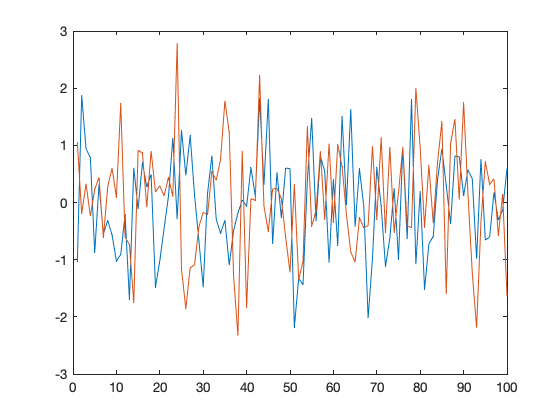

In [4]:
N=100;
dt=1;
time=dt:dt:N;
x1=randn(N,1);
x2=randn(N,1);

plot(time,x1,time,x2)

In MATLAB, the cov function gives the covariance matrix, which is the variance of each column on the diagonals and the covariance on the off-diagonals.

In [11]:
C=cov(x1,x2)


C =

    0.7875   -0.0374
   -0.0374    0.9541



In [14]:
%And then r would be the following, where the diagonal elements should be near one and the off-diagonals
%should be the correlation coefficient:
C./sqrt(C(1,1).*C(2,2))


ans =

    0.9085   -0.0432
   -0.0432    1.1007



You might wonder how to judge whether a correlation coefficient is
statistically significant.  Correlation coefficients should have a Gaussian
distribution, which means that cumulative distribution function will be
an error function.  We can use this to determine the correlation coefficient
that we might expect from an equivalent number of random white noise
variables:
$$
\delta r = \text{erf}^{-1}(p) \sqrt{\frac{2}{N}}
$$
where $p$ is the significance level we want to consider, typically 0.95,
and $N$ is the effective number of degrees of freedom.)

In [19]:
%We won't do this here, but we can show this by increasing N to see the 
%correlation coefficient drop:
N=1000000;
dt=1;
time=dt:dt:N;
x1=randn(N,1);
x2=randn(N,1);
C=cov(x1,x2);
C./sqrt(C(1,1).*C(2,2))


ans =

    1.0000   -0.0002
   -0.0002    1.0000



It's also useful to consider the covariance of a time series with itself.  Of course, this is simply the variance.  A more useful quantity is the *lagged autocovariance*, 

$$
C_{yy}(\tau)\equiv E[\{y(t)-\mu\}\{y(t+\tau) - \mu\}]
$$

$$
=\frac{1}{N-k} \sum_{i=1}^{N-k} [y_i-\bar{y}][y_{i+k}-\bar{y}]
$$
where $\tau=k\Delta t$ is the time lag.  Note that $C_{yy}(0)=\sigma^2$; the covariance at lag zero is the variance (though note the need to normalize by N-1 rather than N as we discussed earlier).

We can also define an analogous quantity the lagged cross covariance between two time series:
$$
C_{xy}(\tau)\equiv E[\{x(t)-\mu_x\}\{y(t+\tau) - \mu_y\}]
$$

Note that inconsistencies in notation abound so be careful.

In MATLAB, we use the xcov function for autocovariance and cross covariance, but need to divide by N-|k| to get the normalization right by specifying 'unbiased'.

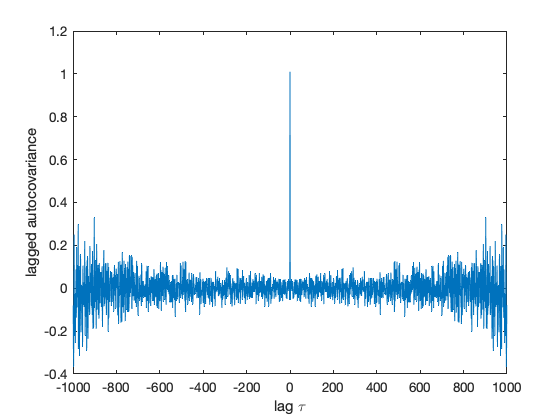

In [2]:
N=1000;
dt=1;
time=dt:dt:N;
tau=(-(N-1):(N-1))*dt;
x1=randn(N,1);
x2=randn(N,1);
C=xcov(x1,x1,'unbiased');
%
plot(tau,C)
ylabel('lagged autocovariance')
xlabel('lag \tau')

Note that "white noise" or Gaussian noise is uncorrelated with itself at all lags except $\tau$ =0, so it's a $\delta$-function: 

$$
C_{yy}(\tau)=\sigma_y^2\delta(\tau)
$$
which will be important later when we relate the autocovariance to the spectrum!

Finally, we conclude with the cross covariance between two time series.  If we have extra time we can code up a couple of different time series and examine the covariance when there is a signal present in addition to noise.

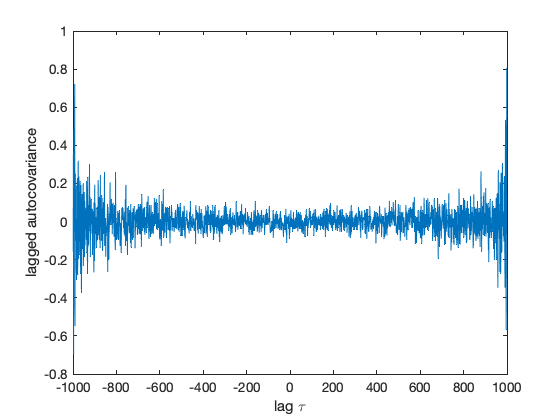

In [32]:
C=xcov(x1,x2,'unbiased');
%
plot(tau,C)
ylabel('lagged autocovariance')
xlabel('lag \tau')

Finally, this is great to think about the correlation and covariance of two purely noise time series, but in practice (we hope) our data has signal!  First let's try to get some intuition on covariance of sinusoids - recall that the lagged covariance is really saying "how many time steps in the future does our time series give us information?"  For white noise, the answer should be "we have no predictive ability at all except for at lag 0."  For a sinusoid though, if there is no noise we can predict that time series out to infinity.  The lagged correlation oscillates from one to -1 depending on the phase.  So we can write another little matlab script to let us play with the relative magnitude of a sinusoid "signal" plus random noise:

In [ ]:
N=1000;
dt=1;
time=dt:dt:N;
tau=(-(N-1):(N-1))*dt;
x1=randn(N,1);
x2=randn(N,1);
%Now let's add a signal
x1=0.5*sin(2*pi*1/7/24.*time.')+1*randn(N,1);
x2=0.5*sin(2*pi*1/7/24.*time.')+1*randn(N,1);

plot(time,x1,time,x2);

Now we can look at the lagged covariance.  If signal dominates noise, the lagged covariance should look a lot like a cosine - if noise dominates, it should look more like a delta function as before.

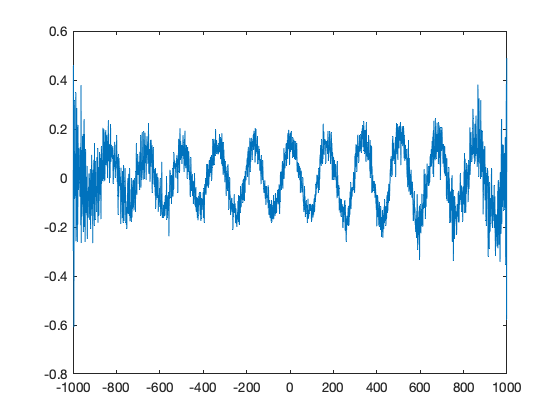

In [15]:
C=xcov(x1,x2,'unbiased');
%
%
plot(tau,C)
%ylabel('lagged autocovariance')
%xlabel('lag \tau')